<a href="https://colab.research.google.com/github/Auzek2002/Linear_Regression_1_Var_ML/blob/main/Linear_Regression_1_Variable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing The Libraries:


In [57]:
import numpy as np
import matplotlib.pyplot as plt
import math,copy

Model for Linear Regression:


In [56]:
def model(x,w,b):
  m=x.shape[0]
  f_wb= np.zeros(m)
  for i in range (m):
    f_wb[i]= w*x[i]+b

  return f_wb

Computing the cost (Cost Function):

In [58]:
def compute_cost(x,y,w,b):
  m=x.shape[0]
  cost =0
  for i in range (m):
    f_wb= w*x[i]+b
    cost+= (f_wb-y[i])**2
  total_cost = (1/2*m)*cost
  return total_cost

Calculating gradiant of j(w,b) with respect to w and j(w,b) with respect to b:

In [59]:
def compute_gradiant(x,y,w,b):
  m=x.shape[0]
  dj_dw=0
  dj_db=0
  for i in range (m):
    f_wb=w*x[i]+b
    dj_dw_i=(f_wb-y[i])*x[i]
    dj_db_i= f_wb-y[i]
    dj_db+=dj_db_i
    dj_dw+=dj_dw_i

  dj_dw = dj_dw/m
  dj_db = dj_db/m

  return dj_dw, dj_db





Gradient Descent Algo:

In [60]:
def gradiant_descent(x,y,w_in,b_in,alpha,num_iters,cost_function,gradiant_function):
  j_history=[]
  p_history=[]
  w=w_in
  b=b_in
  for i in range (num_iters):
    dj_dw,dj_db= gradiant_function(x,y,w,b)
    w=w-alpha*dj_dw
    b=b-alpha*dj_db

    #for plotting save j and w,b values:
    j_history.append(cost_function(x,y,w,b))
    p_history.append([w,b])

    #print out the cost for every 10 intervals:
    if i% math.ceil(num_iters/10) == 0:
      print(f"iteration : {i:4}, cost: {j_history[-1]:0.2e}, ",
            f"dj_dw: {dj_dw:0.3e}, dj_db: {dj_db:0.3e}, "
            f"w: {w:0.3e}, b: {b: 0.3e}")

  return w,b,j_history,p_history


Using the Gradiant Descent Algo:

In [74]:
w_init=0
b_init=0
iterations=12
alpha=1.0e-1
x_train=np.array([1.0,1.8,2.0,2.5,3.1,3.5,3.8,4.3,4.5,5.1,5.5,5.8])
y_train=np.array([250.0,300.0,320.0,350.0,410.0,440.0,480.0,520.0,570.0,620.0,660.0,685.0])
w_final,b_final,j_hist,p_hist= gradiant_descent(x_train,y_train,w_init,b_init,alpha,iterations,compute_cost,compute_gradiant)

print(f"Final Value of W is: {w_final:8.4f} and the Final Value of B is: {b_final:8.4f} ")

iteration :    0, cost: 5.87e+06,  dj_dw: -1.876e+03, dj_db: -4.671e+02, w: 1.876e+02, b:  4.671e+01
iteration :    2, cost: 7.67e+05,  dj_dw: -6.321e+02, dj_db: -1.667e+02, w: 1.412e+02, b:  3.836e+01
iteration :    4, cost: 1.80e+05,  dj_dw: -2.117e+02, dj_db: -6.482e+01, w: 1.251e+02, b:  3.724e+01
iteration :    6, cost: 1.08e+05,  dj_dw: -6.961e+01, dj_db: -3.015e+01, w: 1.192e+02, b:  3.852e+01
iteration :    8, cost: 9.61e+04,  dj_dw: -2.161e+01, dj_db: -1.821e+01, w: 1.169e+02, b:  4.057e+01
iteration :   10, cost: 9.08e+04,  dj_dw: -5.426e+00, dj_db: -1.395e+01, w: 1.157e+02, b:  4.283e+01
Final Value of W is: 114.9357 and the Final Value of B is:  43.8929 


Plotting the graph with the values of W and b:

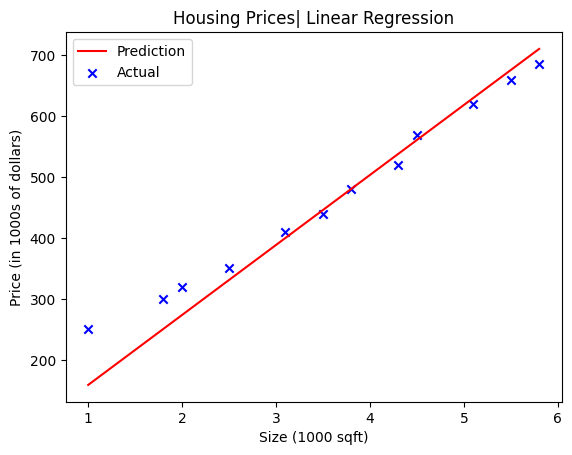

In [77]:
f_wb=model(x_train,w_final,b_final,)
plt.plot(x_train,f_wb,c="r",label="Prediction")
plt.scatter(x_train,y_train,marker="x",c="b",label="Actual")
plt.title("Housing Prices| Linear Regression")
plt.xlabel("Size (1000 sqft)")
plt.ylabel("Price (in 1000s of dollars)")
plt.legend()
plt.show()

Making Predictions:

In [90]:
#say I Want to find the price of a house which is 1250 sqft i.e -> 1.25
size= input("Enter the Size of the house you want the price of: ")
print(f"The Price of a house of size: {size} (in 1000 sqft) is around : {w_final*float(size) + b_final:0.1f} (in 1000s of dollars)")


Enter the Size of the house you want the price of: 1.25
The Price of a house of size: 1.25 (in 1000 sqft) is around : 187.6 (in 1000s of dollars)
